In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset =pd.read_excel("loan.xlsx")
dataset.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000
1,28,Female,Master's,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000


In [3]:
dataset.describe()

,Age,Years of Experience,Salary
count,59.000000,59.000000,59.000000
mean,36.440678,9.254237,98050.847458
std,7.920448,6.859660,51862.026414
min,24.000000,0.000000,35000.000000
25%,29.500000,3.000000,57500.000000
50%,36.000000,7.000000,80000.000000
75%,42.500000,14.500000,130000.000000
max,52.000000,25.000000,250000.000000


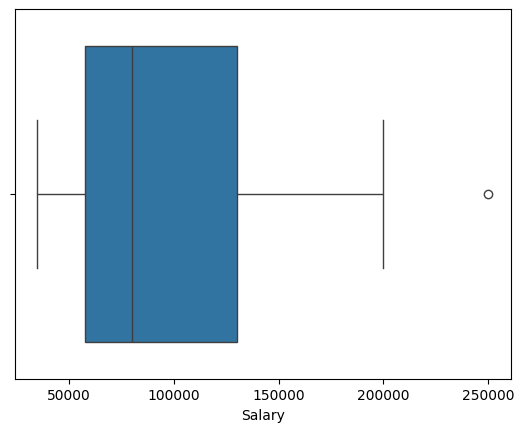

In [4]:
sns.boxplot(x="Salary", data=dataset)
plt.show()

In [5]:
dataset.shape

(59, 6)

In [6]:
q1 =dataset["Salary"].quantile(0.25)
q3 =dataset["Salary"].quantile(0.75)




In [7]:
IQR = q3-q1

In [8]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5* IQR)
min_range, max_range

(-51250.0, 238750.0)

In [9]:
new_dataset=dataset[dataset["Salary"] <= max_range]
new_dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000
1,28,Female,Master's,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000
3,36,Female,Bachelor's,Sales Associate,7,60000
4,52,Male,Master's,Director,20,200000
5,29,Male,Bachelor's,Marketing Analyst,2,55000
6,42,Female,Master's,Product Manager,12,120000
7,31,Male,Bachelor's,Sales Manager,4,80000
8,26,Female,Bachelor's,Marketing Coordinator,1,45000
9,38,Male,PhD,Senior Scientist,10,110000


## Remove Outliers using Z Score

In [10]:
dataset.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

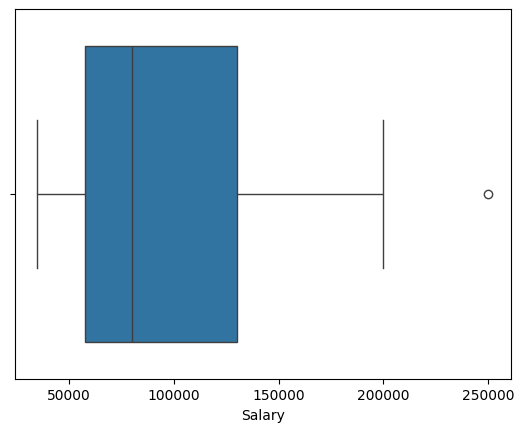

In [11]:
sns.boxplot(x=dataset["Salary"])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\474369814.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

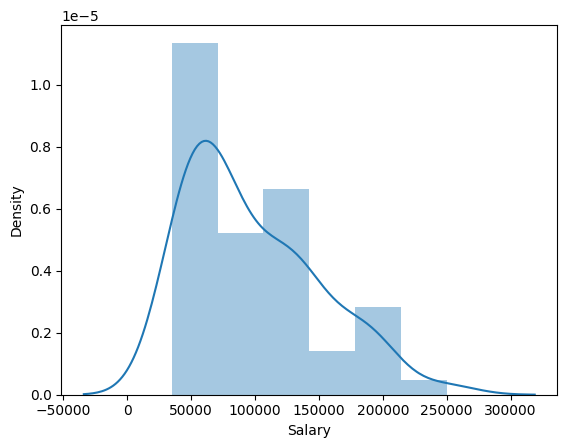

In [12]:
sns.distplot(dataset["Salary"])

In [13]:
#Remove outlier
min_2= dataset["Salary"].mean() -(3*dataset["Salary"].std())
max_2 =dataset["Salary"].mean() +(3*dataset["Salary"].std())
min_2, max_2

(-57535.231783960946, 253636.9266992152)

In [14]:
new_2=dataset[dataset["Salary"] <=max_2]

In [15]:
z_score =(dataset["Salary"] - dataset["Salary"].mean())/ (dataset["Salary"].std())

In [16]:
dataset["z_score"]=z_score

In [17]:
dataset[dataset["z_score"] < 3]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,z_score
0,32,Male,Bachelor's,Software Engineer,5,90000,-0.155236
1,28,Female,Master's,Data Analyst,3,65000,-0.637284
2,45,Male,PhD,Senior Manager,15,150000,1.001680
3,36,Female,Bachelor's,Sales Associate,7,60000,-0.733694
4,52,Male,Master's,Director,20,200000,1.965776
5,29,Male,Bachelor's,Marketing Analyst,2,55000,-0.830103
6,42,Female,Master's,Product Manager,12,120000,0.423222
7,31,Male,Bachelor's,Sales Manager,4,80000,-0.348055
8,26,Female,Bachelor's,Marketing Coordinator,1,45000,-1.022923
9,38,Male,PhD,Senior Scientist,10,110000,0.230403
